# 👹 End-to-end Multi class Mythological Beast classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the mythological creature name given an image of a creature.

When submitting photo of creature, I can get to know the creature name from ml model.

## 2. Data

The data we're using is from created by me and photos are downloaded from Google.

## 3. Evaluation

The evaluation is a file with prediction probabilites for each creature name identification competition.

## 4. Features

Some information about the data:
  * We're dealing with images (unstructred data) so it's probably the best we use deep learning/transfer learning.
  * There are 5 different creature's  (this means there are 5 different classes).
  * There are 100 images in training sets(these images have labels).
  * There are around 10 to 20 images in testing sets(these images have no label, because we need to predict them).
  


In [ ]:
# Uncomment - If running on Google Colab

from google.colab import drive
drive.mount('/content/drive')

model_path = "drive/MyDrive/mytho-beast-cnn/"

In [ ]:
# Uncomment - If running on local system

# model_path = r'C:\Users\Nitish\Desktop\mytho-beast-cnn\\'


### Getting our workspace ready.

1. Install and then import Tensorflow 2.x
2. Install and then import Tensorflow Hub
3. Varyfing for using a GPU

In [ ]:
!pip install --upgrade tensorflow tensorflow-hub


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version", tf.__version__)
print("Tensorflow hub", hub.__version__)

#Check for GPU availability
print("GPU", "is available" if tf.config.list_physical_devices("GPU") else "not available")


Tensorflow version 2.17.0
Tensorflow hub 0.16.1
GPU not available


## Getting our data ready(turning into tensors)

With all machine learning models, our data has to be in numerical format. So that's what we need to do first. Turning our images into tensors(numerical representations).

In [ ]:
import csv

# Define the data
groups = ['Centaur', 'Griffin', 'Hydra', 'Minotaur', 'Pegasus']
rows = []

for group in groups:
    for i in range(1, 21):  # 5 entries for each group
        rows.append([f"{group}_{i}", group])
# Specify the directory where you want to save the file
save_path = model_path+'labels.csv'

# Writing to CSV
with open(save_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'creature'])  # Writing the header
    writer.writerows(rows)  # Writing the rows

print("CSV file 'labels.csv' created successfully.")


CSV file 'labels.csv' created successfully.


In [ ]:
# Checkout the labels of our data

import pandas as pd

labels_csv = pd.read_csv(model_path+"labels.csv")
labels_csv.describe()


id creature
count         100      100
unique        100        5
top     Centaur_1  Centaur
freq            1       20

In [ ]:
# How many images are there of each type?
labels_csv["creature"].value_counts()

creature
Centaur     20
Griffin     20
Hydra       20
Minotaur    20
Pegasus     20
Name: count, dtype: int64

<Axes: xlabel='creature'>

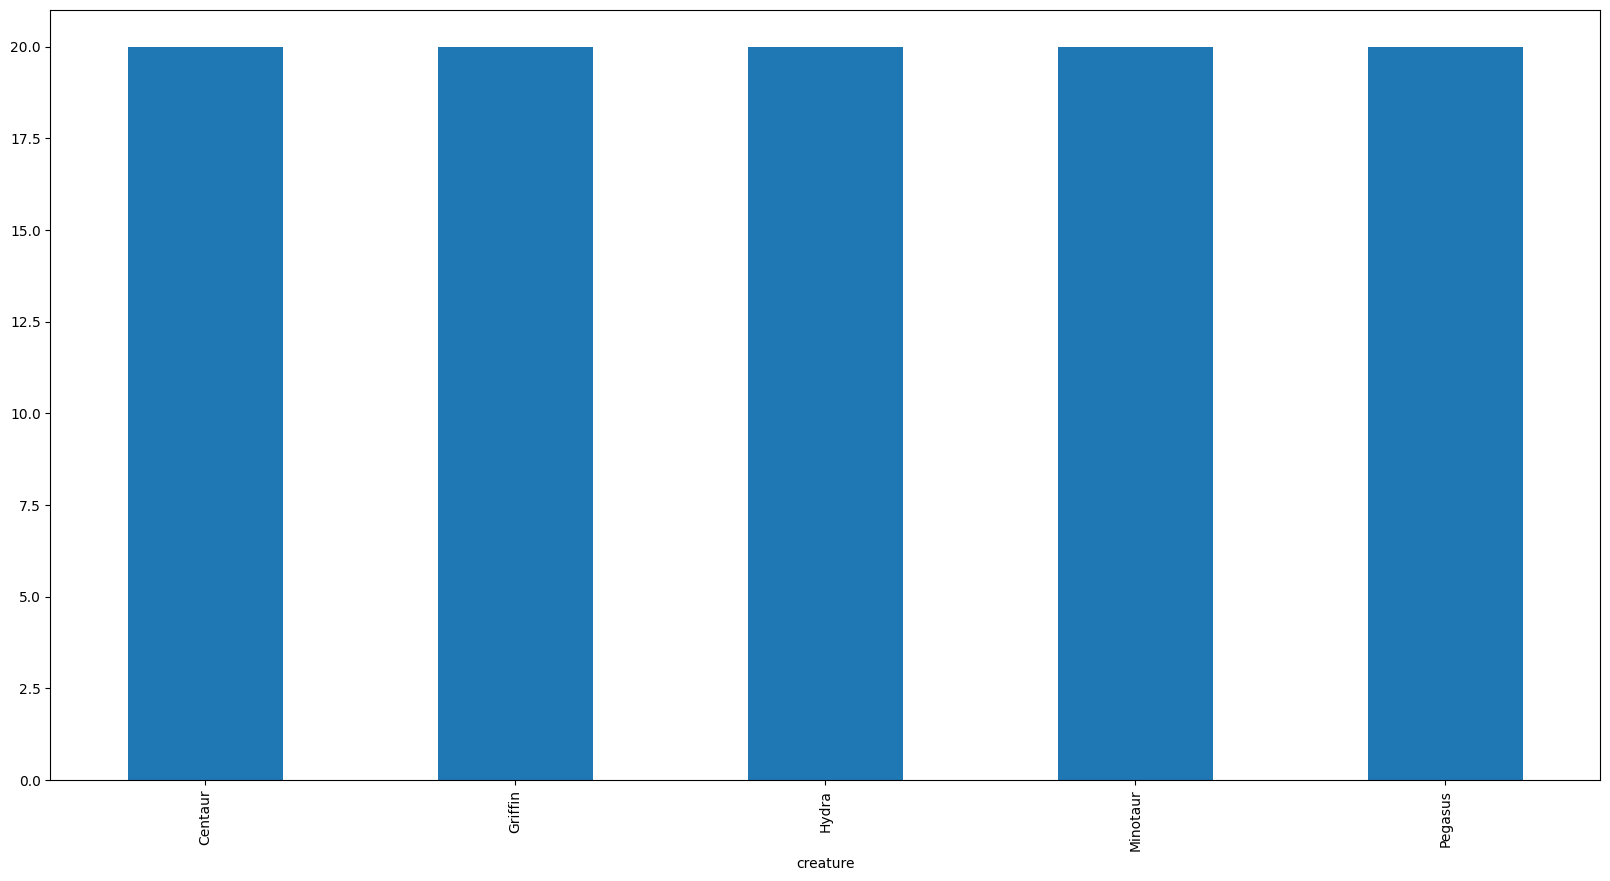

In [ ]:
labels_csv["creature"].value_counts().plot.bar(figsize=(20,10))

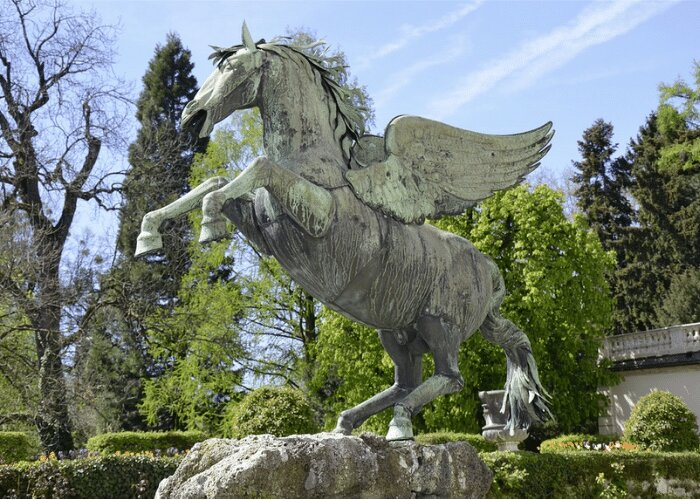

In [ ]:
# Let's view an Image

from IPython.display import Image
Image(model_path+"train/Pegasus_17.jpg")

## Getting images and their labels.

Let's get a list of all our image file pathnames.

In [ ]:
filenames = [model_path+"train/"+fname+".jpg" for fname in labels_csv["id"]]


print(len(filenames))

100


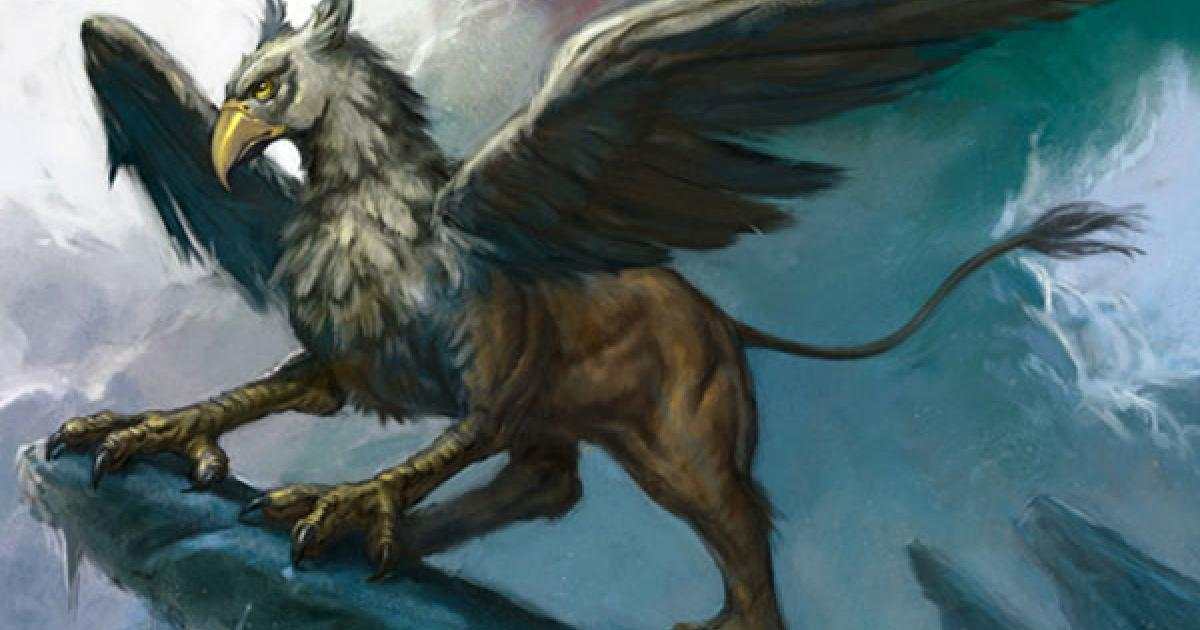

In [ ]:
Image(filenames[27])

In [ ]:
labels_csv["creature"][27]

'Griffin'

In [ ]:
import numpy as np

labels = labels_csv["creature"]

labels = np.array(labels)
labels

array(['Centaur', 'Centaur', 'Centaur', 'Centaur', 'Centaur', 'Centaur',
       'Centaur', 'Centaur', 'Centaur', 'Centaur', 'Centaur', 'Centaur',
       'Centaur', 'Centaur', 'Centaur', 'Centaur', 'Centaur', 'Centaur',
       'Centaur', 'Centaur', 'Griffin', 'Griffin', 'Griffin', 'Griffin',
       'Griffin', 'Griffin', 'Griffin', 'Griffin', 'Griffin', 'Griffin',
       'Griffin', 'Griffin', 'Griffin', 'Griffin', 'Griffin', 'Griffin',
       'Griffin', 'Griffin', 'Griffin', 'Griffin', 'Hydra', 'Hydra',
       'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra',
       'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Hydra',
       'Hydra', 'Hydra', 'Hydra', 'Hydra', 'Minotaur', 'Minotaur',
       'Minotaur', 'Minotaur', 'Minotaur', 'Minotaur', 'Minotaur',
       'Minotaur', 'Minotaur', 'Minotaur', 'Minotaur', 'Minotaur',
       'Minotaur', 'Minotaur', 'Minotaur', 'Minotaur', 'Minotaur',
       'Minotaur', 'Minotaur', 'Minotaur', 'Pegasus', 'Pegasus',
       'Pegasus', 'P

In [ ]:
len(labels)

100

In [ ]:
# find the unique label values
unique_labels = np.unique(labels)

unique_labels

array(['Centaur', 'Griffin', 'Hydra', 'Minotaur', 'Pegasus'], dtype=object)

In [ ]:
len(unique_labels)

5

In [ ]:
# Turning a single labels into an array of booleans

print(labels[0])

labels[0] == unique_labels

Centaur


array([ True, False, False, False, False])

In [ ]:
# Turning every label into a boolean array

boolean_labels = [label == unique_labels for label in labels]

boolean_labels[:2]

[array([ True, False, False, False, False]),
 array([ True, False, False, False, False])]

In [ ]:
len(boolean_labels)

100

In [ ]:
# Example: Turning boolean array into integers

print(labels[0]) #Original labels
print(np.where(unique_labels == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

Centaur
(array([0], dtype=int64),)
0
[1 0 0 0 0]


## Creating our own validations set

Since we don't have validation set, we need to create our own.

In [ ]:
# Setup X and Y variables

x = filenames
y = boolean_labels

### We're going to start with 100 images

In [ ]:
# Set number of images to use for exprementing

NUM_IMAGES = 100 #@param {type:"slider", min:10, max:100, step: 10}

In [ ]:
# Let's split our data into train and validations sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size of NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(
    x[:NUM_IMAGES],
    y[:NUM_IMAGES],
    test_size=0.2,
    random_state=42
)

len(x_train), len(y_train), len(x_val), len(y_val)

(80, 80, 20, 20)

In [ ]:
#Let's see the training data

x_train[:5], y_train[:2]

(['C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\train/Hydra_16.jpg',
  'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\train/Pegasus_9.jpg',
  'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\train/Griffin_7.jpg',
  'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\train/Hydra_3.jpg',
  'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\train/Minotaur_10.jpg'],
 [array([F

## Preprocessing Images (turning images into tensors)

To preprocess our images into tensors we're going to write a function which does a few things:
1. Take an image file path as input
2. Use TensorFlow to read the file and save it to the variable, `image`
3. Turn our `image`(jpg) into Tensors
4. Normalize our image (convert color channnel values from 0-255 to 0-1)
5. Resize the `image`to be a shape of `(244, 244)`
6. Return the modified `image`

In [ ]:
# Convert the image to an NumPy array

from matplotlib.pyplot import imread
image = imread(filenames[23])
image.shape

(800, 1089, 3)

In [ ]:
# turning image into tensor

tf.constant(image)

<tf.Tensor: shape=(800, 1089, 3), dtype=uint8, numpy=
array([[[101, 105, 116],
        [ 98, 102, 113],
        [ 95, 101, 115],
        ...,
        [114, 123, 140],
        [114, 123, 140],
        [111, 120, 137]],

       [[102, 104, 116],
        [ 98, 102, 113],
        [ 97, 100, 115],
        ...,
        [114, 123, 140],
        [114, 123, 140],
        [112, 121, 138]],

       [[105, 105, 117],
        [102, 102, 114],
        [101, 100, 116],
        ...,
        [114, 123, 140],
        [114, 123, 140],
        [112, 121, 138]],

       ...,

       [[ 71,  73,  86],
        [ 85,  87, 100],
        [ 66,  65,  79],
        ...,
        [ 61,  55,  57],
        [ 61,  55,  57],
        [ 61,  55,  57]],

       [[ 75,  77,  90],
        [ 80,  82,  95],
        [ 68,  67,  81],
        ...,
        [ 61,  55,  57],
        [ 61,  55,  57],
        [ 61,  55,  57]],

       [[ 79,  81,  94],
        [ 68,  70,  83],
        [ 74,  73,  87],
        ...,
        [ 61,  55,  

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images with stronger data augmentation
def process_image(image_path, img_size=IMG_SIZE):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[img_size, img_size])

    # Apply stronger data augmentation
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_hue(image, max_delta=0.3)

    # Rotate the image
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    # Translate the image
    translations = tf.random.uniform(shape=[2], minval=-20, maxval=20, dtype=tf.float32)
    transforms = [1, 0, translations[0], 0, 1, translations[1], 0, 0]
    image = tf.raw_ops.ImageProjectiveTransformV2(
        images=tf.expand_dims(image, 0),
        transforms=tf.convert_to_tensor([transforms]),
        output_shape=tf.shape(image)[:2],
        interpolation="BILINEAR"
    )[0]

    return image






## Turning data into batches

In [ ]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  preprocess the image and returns the tuple (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(x) and label(y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """

  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepatch (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepath
                                               tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turns filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling image
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch




In [ ]:
# Creating training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
print(np.mean(y_train))

0.2


In [ ]:
# Check out the different attributes of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing the images in data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from the data batch
  """
  #setup the figure
  plt.figure(figsize=(10,10))
  # Determine the number of images to display (whichever is smaller)
  num_images = min(len(images), 25)
  # Loop through the images to display
  for i in range(num_images):
    # create subplots (5 rows, 5 colums)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as title
    plt.title(unique_labels[labels[i].argmax()])

    # Turn off the grid lines off
    plt.axis("off")


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.bool, name=None))>

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0976233].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27300233..0.7066287].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.005424261..0.7201606].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26001304..0.6666042].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.36063644..0.7590003].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3752764].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13604054..1.030

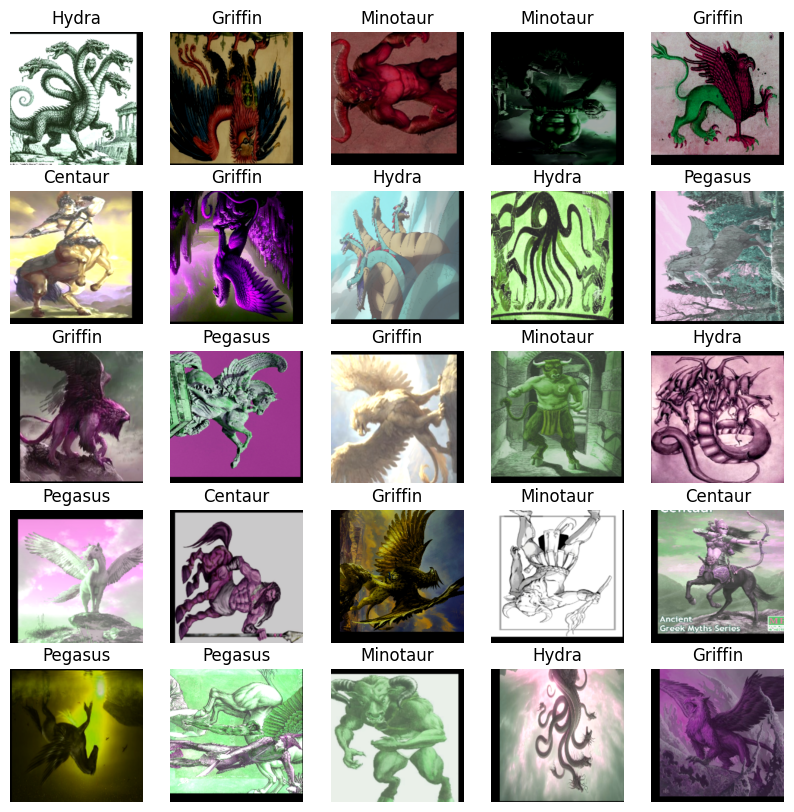

In [ ]:
# NOW LET's visualize the data in training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10912073..0.6367816].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2002542].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0762032].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29160297..0.925316].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1977341].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18729064..0.63761556].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0841297].
Clipping i

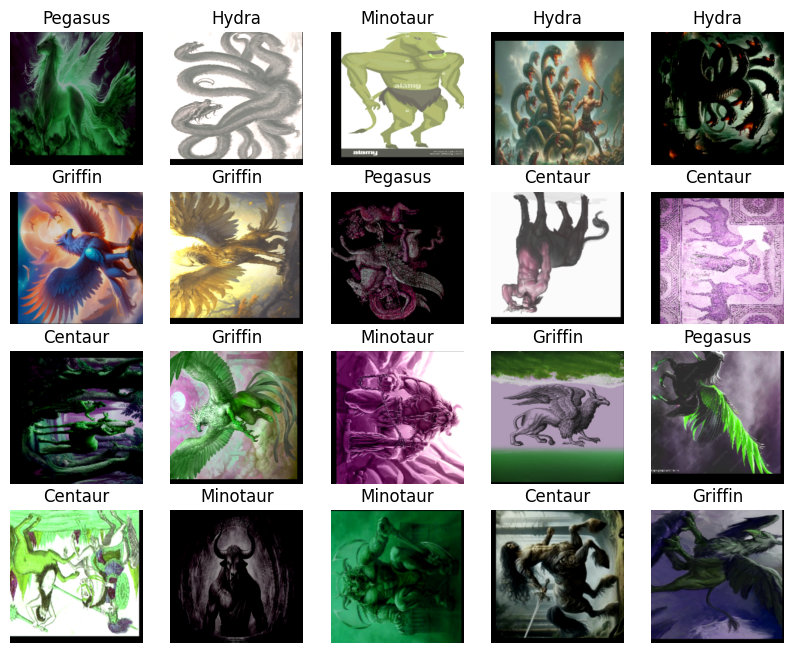

In [ ]:
# Now visualize our validation data

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## TensorBoard Callbacks Functions

1. Load the tensorboard notebook extension
2. Create a tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function
3. Visualize our model training logs with the tensorboard `%tensorboard` magic function (we'll do after model training)

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
import os

# Create a function to build a TensorBoard callback

def create_tensorboard_callback(EPOCHS):
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join(
      model_path+"hyper_logs",
      # Make it so that logs get tracked whenever we run an experiment
      'NumEpochs_' + str(EPOCHS) + '_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  )
  return tf.keras.callbacks.TensorBoard(logdir)

## Building a model

Before we build a model, there are few things we need to define:


*   The input shape (our images shape, in the form of Tensors) to our model
*   The output shape (image labels, in the form of Tensors) to out model
* The url of the model we want to use



In [ ]:
import itertools
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.layers import LeakyReLU, PReLU
from tensorflow.keras.layers import Layer

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3) # height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_labels)

# Parameter grid
param_grid = {
    'optimizer': ['SGD', 'RSMProp', 'Adam'],
    'activation': ['Leaky ReLU', 'PReLU', 'ReLU'],
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 0.1],
    'batch_size': [32, 64, 128, 256, 512],
    'dropout_rate': [0.25, 0.5]
}

MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [ ]:
NUM_EPOCHS = 100 #@param {type: "slider", min: 5, max:100, step: 10}

Now we have got our inputs, outputs and model ready to go. Let's put them togther into a Keras deep learning model!

Knowing this, let's create a function which:
* Take the input shape, output shape and model we've chosen as a parameters.
* Define the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it will be getting).
* Returns the model.


In [ ]:
# Custom Keras layer to wrap the TensorFlow Hub layer
class HubLayer(Layer):
    def __init__(self, model_url, **kwargs):
        super(HubLayer, self).__init__(**kwargs)
        self.hub_layer = hub.KerasLayer(model_url, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l2

# Create a function to build the model with given hyperparameters
def create_model_tf(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL,
                    optimizer='Adam', activation='relu', learning_rate=1e-3, dropout_rate=0.25, l2_reg=0.01):
    print("Building model with:", model_url)
    print( optimizer, activation, learning_rate, dropout_rate, l2_reg)
    # Define the input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Use the custom HubLayer
    x = HubLayer(model_url)(inputs)

    # Check output shape from the hub layer
    print("Shape after hub layer:", x.shape)

    # Add a Dense layer with L2 regularization and the specified activation function
    if activation == 'leaky_relu':
        x = Dense(units=128, kernel_regularizer=l2(l2_reg))(x)
        x = LeakyReLU()(x)
    elif activation == 'prelu':
        x = Dense(units=128, kernel_regularizer=l2(l2_reg))(x)
        x = PReLU()(x)
    else:
        x = Dense(units=128, activation=activation, kernel_regularizer=l2(l2_reg))(x)

    # Add a Dropout layer
    x = Dropout(rate=dropout_rate)(x)

    # Add the output layer
    outputs = Dense(units=output_shape, activation="softmax")(x)

    # Create the model
    model_tf = tf.keras.Model(inputs, outputs)

    # Select the optimizer
    if optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'RMSProp':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)

    # Compile the model
    model_tf.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),  # For one-hot encoded labels
        optimizer=opt,
        metrics=["accuracy"]
    )

    return model_tf

In [ ]:
# Function to perform manual grid search
def manual_grid_search(param_grid, epochs, train_data, val_data):
    best_acc = 0
    best_params = None
    best_model = None

    all_params = list(itertools.product(*param_grid.values()))

    # Create a new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback(NUM_EPOCHS)

    for params in all_params:
        hyper_params = dict(zip(param_grid.keys(), params))

        print(f"\nTraining with parameters: {hyper_params}")

        # Create and compile the model with the current hyperparameters
        model_tf = create_model_tf(
                                learning_rate=hyper_params['learning_rate'],
                                dropout_rate=hyper_params['dropout_rate'])

        model_tf.summary()

        # Train the model (assuming train_data and val_data are already defined)
        history = model_tf.fit(
            train_data,
            epochs=NUM_EPOCHS,  # Example number of epochs
            validation_data=val_data,
            batch_size=hyper_params['batch_size'],
            callbacks=[tensorboard, early_stopping]
        )

        # Evaluate the model on the validation set
        _, val_acc = model_tf.evaluate(val_data)

        print(f"Validation accuracy: {val_acc}")

        # Check if this is the best model so far
        if val_acc > best_acc:
            best_acc = val_acc
            best_params = hyper_params
            best_model = model_tf

    print(f"\nBest accuracy: {best_acc} with parameters: {best_params}")
    return best_model, best_params, best_acc


In [ ]:
model_before_training = create_model_tf()
model_before_training.summary()

Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4



Shape after hub layer: (None, 1001)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer (HubLayer)                 │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

## Early stopping callbacks

Early stopping callbacks helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=10)

In [ ]:
# Run grid search
best_model, best_params, best_acc = manual_grid_search(param_grid, epochs=NUM_EPOCHS, train_data=train_data, val_data=val_data)



Training with parameters: {'optimizer': 'Adam', 'activation': 'relu', 'learning_rate': 0.0001, 'batch_size': 32, 'dropout_rate': 0.1}
Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Shape after hub layer: (None, 1001)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_1 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.2047 - loss: 4.6204 - val_accuracy: 0.1000 - val_loss: 4.8301
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 419ms/step - accuracy: 0.1781 - loss: 4.5824 - val_accuracy: 0.4000 - val_loss: 4.4287
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step - accuracy: 0.2961 - loss: 4.1776 - val_accuracy: 0.2000 - val_loss: 4.3103
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.1930 - loss: 4.5294 - val_accuracy: 0.0500 - val_loss: 4.8869
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 419ms/step - accuracy: 0.2742 - loss: 4.0860 - val_accuracy: 0.4000 - val_loss: 4.0474
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.3102 - loss: 4.0223 - val_accuracy: 0.2500 - val_loss: 3.8407
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - accuracy: 0.3078 - loss: 3.9872 - val_accuracy: 0.3000 - val_loss: 4.1454
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - accuracy: 0.4031 - loss: 3.7693 - val_accuracy: 0.2500 - v

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_2 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 514ms/step - accuracy: 0.1375 - loss: 5.1871 - val_accuracy: 0.2000 - val_loss: 4.0774
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step - accuracy: 0.2000 - loss: 4.4996 - val_accuracy: 0.1500 - val_loss: 4.4469
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - accuracy: 0.2477 - loss: 4.3815 - val_accuracy: 0.4000 - val_loss: 4.5275
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step - accuracy: 0.3422 - loss: 4.1908 - val_accuracy: 0.2500 - val_loss: 3.9753
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.3180 - loss: 4.3381 - val_accuracy: 0.5000 - val_loss: 4.0595
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step - accuracy: 0.3633 - loss: 4.1925 - val_accuracy: 0.4500 - val_loss: 3.8891
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.2969 - loss: 4.0250 - val_accuracy: 0.2500 - val_loss: 3.8832
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - accuracy: 0.2609 - loss: 4.1001 - val_accuracy: 0.2000 - v

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_3 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.1891 - loss: 4.7073 - val_accuracy: 0.1500 - val_loss: 4.8484
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.1898 - loss: 4.5745 - val_accuracy: 0.1000 - val_loss: 4.8845
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.1922 - loss: 4.4615 - val_accuracy: 0.1000 - val_loss: 4.5574
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.3219 - loss: 4.0879 - val_accuracy: 0.3000 - val_loss: 4.3263
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.3406 - loss: 3.9481 - val_accuracy: 0.1500 - val_loss: 4.8337
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step - accuracy: 0.2898 - loss: 4.0058 - val_accuracy: 0.1500 - val_loss: 4.4448
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.3414 - loss: 3.9142 - val_accuracy: 0.1500 - val_loss: 4.4195
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step - accuracy: 0.4164 - loss: 3.7367 - val_accuracy: 0.2000 - v

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_4 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.2320 - loss: 4.8849 - val_accuracy: 0.2000 - val_loss: 4.7532
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 0.2781 - loss: 4.8718 - val_accuracy: 0.0500 - val_loss: 4.9750
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - accuracy: 0.2531 - loss: 4.5198 - val_accuracy: 0.2500 - val_loss: 4.3497
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 0.2609 - loss: 4.2150 - val_accuracy: 0.2000 - val_loss: 4.4164
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.3500 - loss: 3.9579 - val_accuracy: 0.2500 - val_loss: 3.9202
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - accuracy: 0.3562 - loss: 4.0325 - val_accuracy: 0.2500 - val_loss: 4.4462
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - accuracy: 0.2852 - loss: 4.3401 - val_accuracy: 0.4000 - val_loss: 4.0128
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.4531 - loss: 3.9328 - val_accuracy: 0.2500 - v

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_5 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 522ms/step - accuracy: 0.2539 - loss: 4.5498 - val_accuracy: 0.3500 - val_loss: 4.5562
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.4688 - loss: 3.4972 - val_accuracy: 0.4500 - val_loss: 3.7461
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.5578 - loss: 3.3612 - val_accuracy: 0.4500 - val_loss: 3.5919
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.7047 - loss: 2.8826 - val_accuracy: 0.5500 - val_loss: 3.3658
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.7727 - loss: 2.8374 - val_accuracy: 0.3500 - val_loss: 4.1313
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.7680 - loss: 2.7104 - val_accuracy: 0.3000 - val_loss: 4.0939
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.8648 - loss: 2.5526 - val_accuracy: 0.4500 - val_loss: 3.3782
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 0.8531 - loss: 2.5322 - val_accuracy: 0.6000 - v

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_6 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.2797 - loss: 4.6611 - val_accuracy: 0.4000 - val_loss: 3.9300
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.4375 - loss: 3.7126 - val_accuracy: 0.3500 - val_loss: 3.7438
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.6570 - loss: 3.3042 - val_accuracy: 0.4500 - val_loss: 3.7721
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step - accuracy: 0.7789 - loss: 2.8301 - val_accuracy: 0.4500 - val_loss: 3.4400
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.6906 - loss: 2.9291 - val_accuracy: 0.4000 - val_loss: 3.8823
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.8227 - loss: 2.6773 - val_accuracy: 0.4000 - val_loss: 3.9807
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step - accuracy: 0.8359 - loss: 2.6881 - val_accuracy: 0.4500 - val_loss: 3.4383
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.7906 - loss: 2.7011 - val_accuracy: 0.5500 - v

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_7 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.1906 - loss: 4.7015 - val_accuracy: 0.3000 - val_loss: 4.2281
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - accuracy: 0.4805 - loss: 3.6310 - val_accuracy: 0.3500 - val_loss: 4.2159
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 413ms/step - accuracy: 0.6500 - loss: 3.0832 - val_accuracy: 0.2500 - val_loss: 3.9453
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step - accuracy: 0.8594 - loss: 2.7529 - val_accuracy: 0.4000 - val_loss: 3.8550
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.8469 - loss: 2.7222 - val_accuracy: 0.4500 - val_loss: 3.6172
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.7984 - loss: 2.7056 - val_accuracy: 0.5500 - val_loss: 3.8222
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.9086 - loss: 2.4707 - val_accuracy: 0.5500 - val_loss: 3.5983
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.8023 - loss: 2.6777 - val_accuracy: 0.3500 - v

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_8 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.2047 - loss: 4.8312 - val_accuracy: 0.3500 - val_loss: 4.2146
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.5102 - loss: 3.7701 - val_accuracy: 0.4000 - val_loss: 4.0038
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.6094 - loss: 3.4502 - val_accuracy: 0.4500 - val_loss: 3.6921
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 0.6711 - loss: 3.1196 - val_accuracy: 0.5500 - val_loss: 3.3369
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.7172 - loss: 3.0089 - val_accuracy: 0.5500 - val_loss: 3.4129
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - accuracy: 0.8250 - loss: 2.7877 - val_accuracy: 0.4500 - val_loss: 3.7824
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 0.8766 - loss: 2.5915 - val_accuracy: 0.6000 - val_loss: 3.4566
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.8773 - loss: 2.5545 - val_accuracy: 0.5500 - v

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_9 (HubLayer)               │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.2859 - loss: 7.5610 - val_accuracy: 0.3000 - val_loss: 7.2654
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 0.5570 - loss: 5.2333 - val_accuracy: 0.4000 - val_loss: 6.8603
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step - accuracy: 0.5008 - loss: 4.7059 - val_accuracy: 0.4500 - val_loss: 4.6874
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.7523 - loss: 4.2013 - val_accuracy: 0.5500 - val_loss: 4.5496
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 0.7578 - loss: 4.0210 - val_accuracy: 0.6000 - val_loss: 5.3392
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.7523 - loss: 3.9470 - val_accuracy: 0.5000 - val_loss: 4.6349
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step - accuracy: 0.8141 - loss: 3.8891 - val_accuracy: 0.5000 - val_loss: 5.1518
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.8125 - loss: 3.5432 - val_accuracy: 0.4500 - v

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_10 (HubLayer)              │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.1484 - loss: 6.4039 - val_accuracy: 0.4500 - val_loss: 8.1876
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step - accuracy: 0.5883 - loss: 5.1335 - val_accuracy: 0.2500 - val_loss: 7.0617
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step - accuracy: 0.6555 - loss: 4.7781 - val_accuracy: 0.3500 - val_loss: 5.6373
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - accuracy: 0.6742 - loss: 4.7787 - val_accuracy: 0.5000 - val_loss: 5.9573
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step - accuracy: 0.7445 - loss: 4.1200 - val_accuracy: 0.6500 - val_loss: 5.6825
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.8391 - loss: 3.9070 - val_accuracy: 0.6000 - val_loss: 5.9207
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.7773 - loss: 4.0769 - val_accuracy: 0.6500 - val_loss: 4.8861
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.8242 - loss: 3.9795 - val_accuracy: 0.5000 - v

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_11 (HubLayer)              │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step - accuracy: 0.2930 - loss: 6.3288 - val_accuracy: 0.6000 - val_loss: 5.3424
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step - accuracy: 0.5813 - loss: 4.9173 - val_accuracy: 0.5500 - val_loss: 5.3575
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 0.6289 - loss: 4.8206 - val_accuracy: 0.5000 - val_loss: 5.8314
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.7625 - loss: 3.7922 - val_accuracy: 0.6500 - val_loss: 4.3578
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.7602 - loss: 4.0491 - val_accuracy: 0.5500 - val_loss: 5.1990
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.8508 - loss: 3.7626 - val_accuracy: 0.4500 - val_loss: 5.3042
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step - accuracy: 0.8117 - loss: 3.7967 - val_accuracy: 0.4500 - val_loss: 5.1474
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - accuracy: 0.8203 - loss: 3.6673 - val_accuracy: 0.5000 - v

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer_12 (HubLayer)              │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,901 (503.52 KB)

 Trainable params: 128,901 (503.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 491ms/step - accuracy: 0.1883 - loss: 6.9608 - val_accuracy: 0.5000 - val_loss: 5.8047
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - accuracy: 0.4859 - loss: 5.1608 - val_accuracy: 0.4000 - val_loss: 5.6107
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.6117 - loss: 4.3864 - val_accuracy: 0.4500 - val_loss: 4.6637
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step - accuracy: 0.7133 - loss: 4.1534 - val_accuracy: 0.4500 - val_loss: 5.2677
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - accuracy: 0.7609 - loss: 4.2056 - val_accuracy: 0.6500 - val_loss: 4.5769
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step - accuracy: 0.8211 - loss: 3.9286 - val_accuracy: 0.5000 - val_loss: 4.5806
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.8375 - loss: 3.7584 - val_accuracy: 0.7500 - val_loss: 3.9528
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 0.8562 - loss: 3.5987 - val_accuracy: 0.3500 - v

In [ ]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model_tf(
        optimizer=best_params['optimizer'],
        activation=best_params['activation'],
        learning_rate=best_params['learning_rate'],
        dropout_rate=best_params['dropout_rate']
    )

  # Create a new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback(NUM_EPOCHS)

  # Fit the model to the data passing it the callbacks we created
  history = model.fit(
        x=train_data,
        epochs=NUM_EPOCHS,
        validation_data=val_data,
        validation_freq=1,
        callbacks=[tensorboard, early_stopping]
  )

    # return the fitted model and history object
  return model, history

In [ ]:
model, history = train_model()

Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Adam relu 0.01 0.1 0.01
Shape after hub layer: (None, 1001)
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.2625 - loss: 7.8023 - val_accuracy: 0.4000 - val_loss: 10.2922
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step - accuracy: 0.4680 - loss: 7.0237 - val_accuracy: 0.5000 - val_loss: 5.1493
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.7188 - loss: 3.8172 - val_accuracy: 0.6000 - val_loss: 4.0954
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.6102 - loss: 4.1682 - val_accuracy: 0.5000 - val_loss: 4.6000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step - accuracy: 0.6875 - loss: 4.1439 - val_accuracy: 0.4500 - val_loss: 4.5775
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.6898 - loss: 3.9461 - val_accuracy: 0.5000 - val_loss: 4.6174
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step - accuracy: 0.8320 - loss: 3.7157 - va

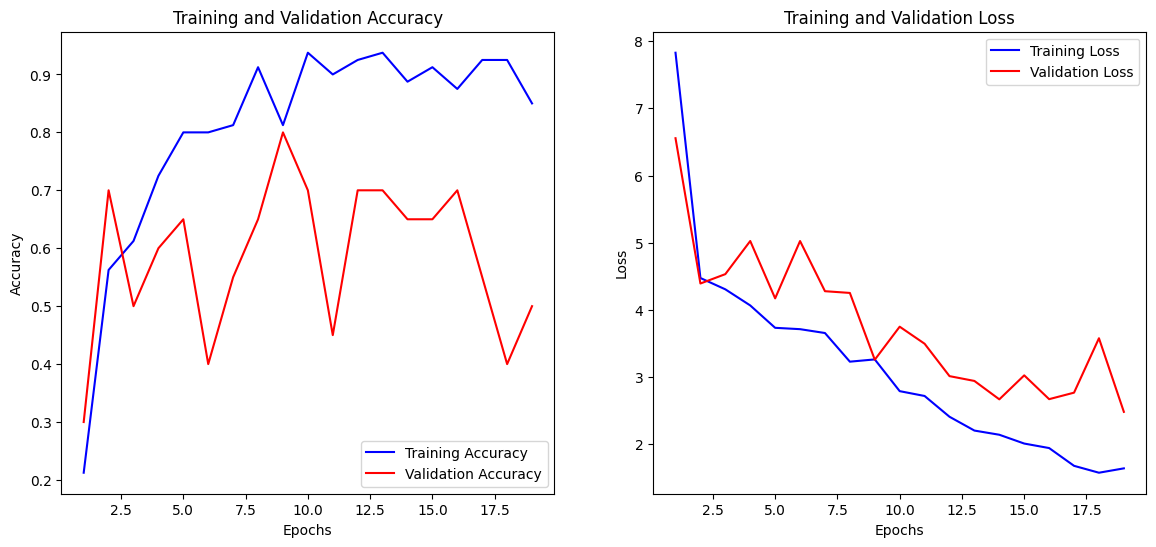

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_accuracy) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Making and evaluating predictions using a trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.bool, name=None))>

In [ ]:
# Make on the predictions data (not used to train on)

predictions = model.predict(val_data, verbose=1)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


array([[3.8214741e-04, 7.5108849e-02, 4.7017491e-04, 1.0200159e-06,
        9.2403787e-01],
       [3.4766275e-05, 3.2807479e-04, 9.9961311e-01, 2.3584760e-05,
        4.5213196e-07],
       [7.4023097e-03, 3.3734250e-06, 1.4776789e-07, 3.7619468e-02,
        9.5497477e-01],
       [1.1052326e-04, 1.6207327e-05, 9.9981242e-01, 5.7702131e-05,
        3.1515367e-06],
       [7.5480137e-05, 1.5425042e-03, 9.8061430e-01, 1.7753514e-02,
        1.4148471e-05],
       [2.6007072e-05, 7.3883355e-01, 1.4323377e-05, 2.7954442e-04,
        2.6084659e-01],
       [1.2353828e-06, 9.9964345e-01, 2.6596111e-04, 3.6121768e-05,
        5.3232710e-05],
       [1.9200738e-04, 6.6842150e-04, 9.9890673e-01, 9.6653501e-05,
        1.3621374e-04],
       [8.2053512e-01, 1.9534230e-08, 2.3400250e-06, 1.7940062e-01,
        6.1839200e-05],
       [9.4306124e-03, 5.3608614e-01, 4.5346215e-01, 2.3539405e-04,
        7.8569225e-04],
       [1.2211983e-01, 5.2110280e-04, 1.1177151e-03, 8.7433666e-01,
        1.90

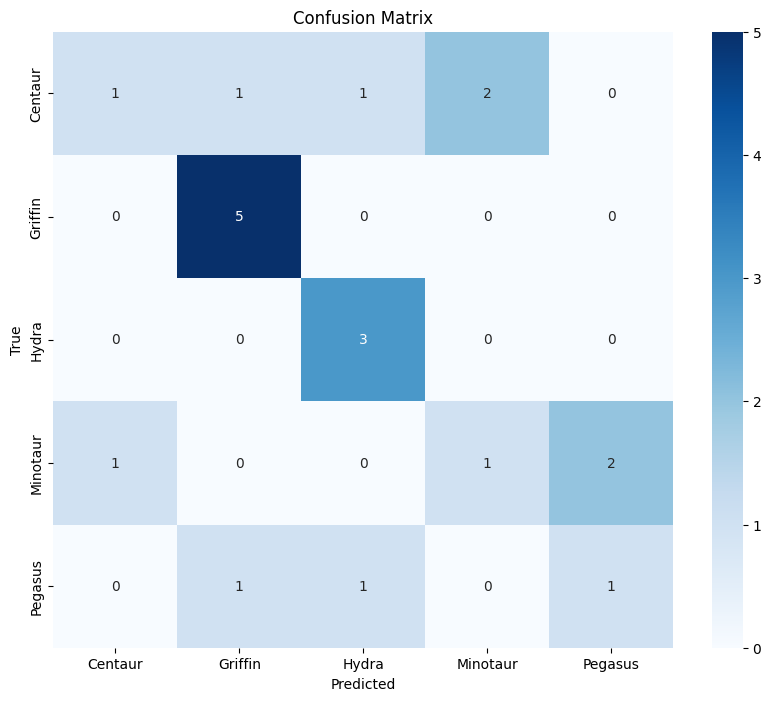

Accuracy: 0.5500
Precision (Macro): 0.4962
F1 Score (Macro): 0.4976
Classification Report:
              precision    recall  f1-score   support

     Centaur       0.50      0.20      0.29         5
     Griffin       0.71      1.00      0.83         5
       Hydra       0.60      1.00      0.75         3
    Minotaur       0.33      0.25      0.29         4
     Pegasus       0.33      0.33      0.33         3

    accuracy                           0.55        20
   macro avg       0.50      0.56      0.50        20
weighted avg       0.51      0.55      0.50        20



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score

# Get the true labels
y_true = []
for _, labels in val_data.unbatch().as_numpy_iterator():
    y_true.append(np.argmax(labels))

# Get the predicted labels
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate the precision (macro)
precision = precision_score(y_true, y_pred, average='macro')
print(f"Precision (Macro): {precision:.4f}")

# Calculate the F1 score (macro)
f1 = f1_score(y_true, y_pred, average='macro')
print(f"F1 Score (Macro): {f1:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=unique_labels))


In [ ]:
# First Predictions

index = 0

print(predictions[index])
print(f"Max value (probability of predictions): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted Label: {unique_labels[np.argmax(predictions[index])]}")
print(f"Prediction shape: {predictions.shape}")

[3.8214741e-04 7.5108849e-02 4.7017491e-04 1.0200159e-06 9.2403787e-01]
Max value (probability of predictions): 0.9240378737449646
Sum: 1.0000001192092896
Max index: 4
Predicted Label: Pegasus
Prediction shape: (20, 5)


In [ ]:
# Turn predictions probabilites into the label

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_labels[np.argmax(prediction_probabilities)]

pred_labels = get_pred_label(predictions[0])
pred_labels

'Pegasus'

In [ ]:
get_pred_label(val_labels[0])

'Pegasus'

In [ ]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels
  """
  images_batch = []
  labels_batch = []
  for image, label in data.unbatch().as_numpy_iterator():
    images_batch.append(image)
    labels_batch.append(unique_labels[np.argmax(label)])

  return images_batch, labels_batch

# Unbatchify the validation data
images_batch, labels_batch = unbatchify(val_data)
images_batch[0], labels_batch[0]

(array([[[0.20241058, 0.34714052, 0.54882026],
         [0.20516686, 0.38240474, 0.57633126],
         [0.2152926 , 0.38799182, 0.5844116 ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.20185226, 0.3700751 , 0.5648781 ],
         [0.20581721, 0.40815097, 0.59482026],
         [0.20612739, 0.39989328, 0.58815616],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.19991395, 0.37479523, 0.56209683],
         [0.20622066, 0.40819785, 0.5895225 ],
         [0.20762104, 0.40666458, 0.58710444],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  #Plot images and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour based on the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change the plot title
  plt.title("{} {:2.0f}% {}".format(
      pred_label,
      np.max(pred_prob)*100,
      true_label
  ), color = color)

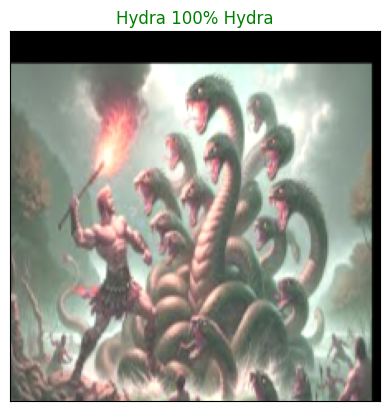

In [ ]:
plot_pred(
    prediction_probabilities=predictions,
    labels=labels_batch,
    images=images_batch,
    n=3)

In [ ]:
def plot_pred_conf(predictions_probabilities, labels, n=1):
  """
  The top 3 highest prediction confidences along with the truth label for sample n
  """

  pred_prob, true_label = predictions_probabilities[n], labels[n]

  # Get the predicted labels
  pred_label = get_pred_label(pred_prob)

  # Find the top 3 prediction confidence indexes
  top_3_pred_indexes = pred_prob.argsort()[-3:][::-1]
  # Find the top 3 prediction confidence values
  top_3_pred_values = pred_prob[top_3_pred_indexes]
  # Find the top 3 prediction labels
  top_3_pred_labels = unique_labels[top_3_pred_indexes]

  # Setup plot
  top_plot = plt.bar(
      np.arange(len(top_3_pred_labels)),
      top_3_pred_values,
      color="grey"
  )
  plt.xticks(np.arange(len(top_3_pred_labels)),
             labels=top_3_pred_labels,
             rotation="vertical")

  # Change the color of true label
  if np.isin(true_label, top_3_pred_labels):
    top_plot[np.argmax(top_3_pred_labels == true_label)].set_color("green")
  else:
    pass

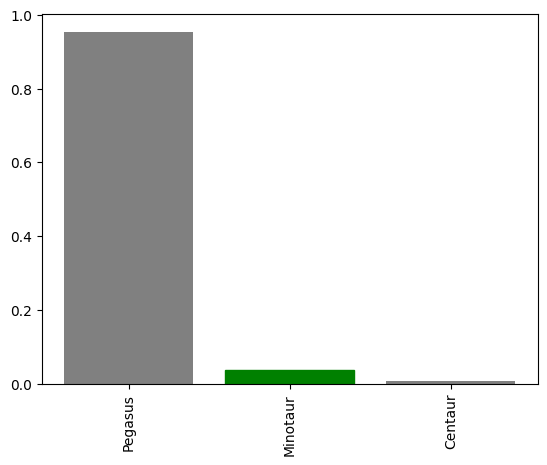

In [ ]:
plot_pred_conf(
    predictions_probabilities=predictions,
    labels=labels_batch,
    n=2
)

In [ ]:
# Few predictions and their different values

i_multiplier = 2
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(
      prediction_probabilities=predictions,
      labels=labels_batch,
      images=images_batch,
      n=i+i_multiplier
  )
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(
      predictions_probabilities=predictions,
      labels=labels_batch,
      n=i+i_multiplier
  )
plt.tight_layout(h_pad=1.0)
plt.show

## Saving and reloading the model

In [ ]:
# Create a function to save a model

def save_model(model):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """

  # Create a model directory pathname with current time
  modeldir = os.path.join(model_path,
                          "hyperparams-models")

  trained_model_path = modeldir + "/" + "models" + ".h5" # save format of model
  print(f"Saving model to: {trained_model_path}...")
  model.save(trained_model_path)

  return trained_model_path

In [ ]:
from keras.utils import CustomObjectScope

def load_model(model_path):
    """
    Loads a saved model from a specified path
    """
    print(f"Loading saved model from: {model_path}")

    # Define the custom object scope
    custom_objects = {'HubLayer': HubLayer}

    with CustomObjectScope(custom_objects):
        model = tf.keras.models.load_model(
            model_path,
            custom_objects=custom_objects
        )
    return model


In [ ]:
# Save our model trained on 1000 images

save_model(model)

Saving model to: C:\Users\Jhevish\Desktop\DHANDGESTURE28July\hand-gesture-recognition-mediapipe-main\Final Mythological Beast CNN-20240905T045906Z-001\Final Mythological Beast CNN\\hyperparams-models/models.h5...


'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\hyperparams-models/models.h5'

In [ ]:
fully_loaded_image_model = load_model(model_path+"hyperparams-models/models.h5")

Loading saved model from: C:\Users\Jhevish\Desktop\DHANDGESTURE28July\hand-gesture-recognition-mediapipe-main\Final Mythological Beast CNN-20240905T045906Z-001\Final Mythological Beast CNN\\hyperparams-models/models.h5


In [ ]:
# Evaluate the pre saved model

model.evaluate(val_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6000 - loss: 2.7202


[2.720196008682251, 0.6000000238418579]

In [ ]:
# Evaluate the loaded model
fully_loaded_image_model.evaluate(val_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step - accuracy: 0.6500 - loss: 2.8127


[2.8127312660217285, 0.6499999761581421]

##Making predictions on the test dataset

In [ ]:
# Load test image filenames
test_path = model_path+"test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames

['C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\test/1.jpg',
 'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\test/10.jpg',
 'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\test/11.jpeg',
 'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\test/12.jpg',
 'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand-gesture-recognition-mediapipe-main\\Final Mythological Beast CNN-20240905T045906Z-001\\Final Mythological Beast CNN\\\\test/13.jpg',
 'C:\\Users\\Jhevish\\Desktop\\DHANDGESTURE28July\\hand

In [ ]:
len(test_filenames)

16

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = fully_loaded_image_model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


In [ ]:
test_predictions.shape

(16, 5)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(test_predictions[i]) for i in range(len(test_predictions))]
custom_pred_labels

['Pegasus',
 'Minotaur',
 'Pegasus',
 'Centaur',
 'Hydra',
 'Centaur',
 'Hydra',
 'Griffin',
 'Pegasus',
 'Centaur',
 'Hydra',
 'Griffin',
 'Pegasus',
 'Centaur',
 'Minotaur',
 'Hydra']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in test_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

len(custom_images)

16

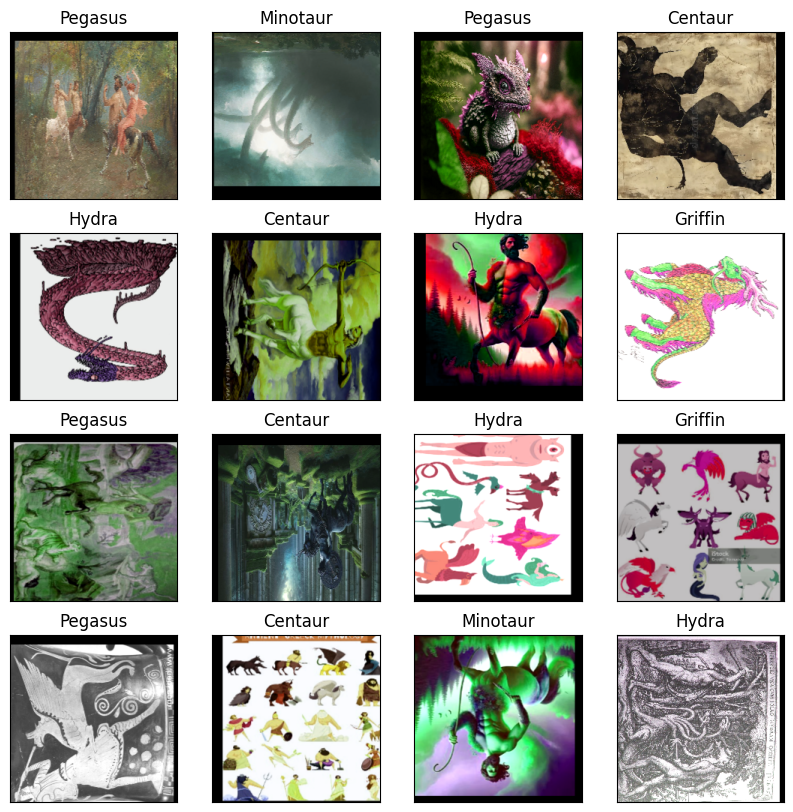

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


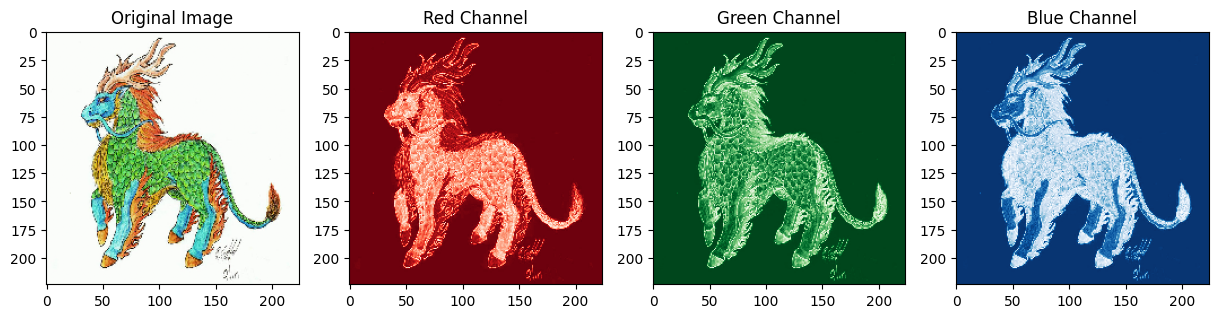

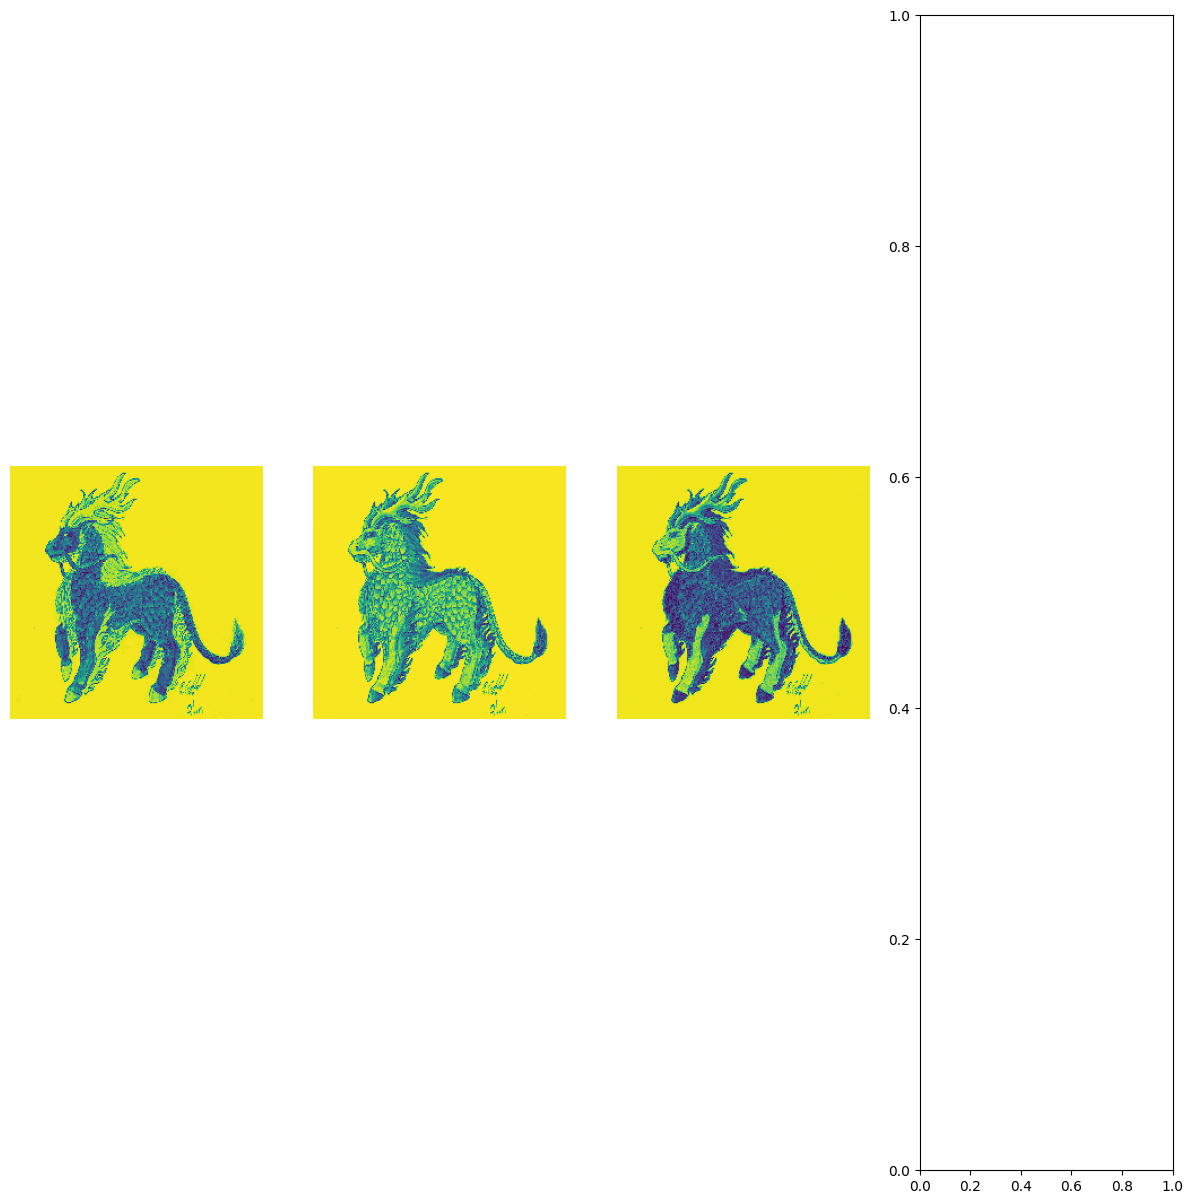

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = model_path+'test/16.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size as per your model's input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image


# Get the model's layers
layer_outputs = [layer.output for layer in fully_loaded_image_model.layers]

# Create a model that outputs each layer's output
activation_model = tf.keras.Model(inputs=fully_loaded_image_model.input, outputs=layer_outputs)

# Get the activations for the given image
activations = activation_model.predict(img_array)

# Visualize the RGB channels of the original image
def plot_rgb_channels(image):
    fig, ax = plt.subplots(1, 4, figsize=(15, 15))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[1].imshow(image[:, :, 0], cmap="Reds")
    ax[1].set_title("Red Channel")
    ax[2].imshow(image[:, :, 1], cmap="Greens")
    ax[2].set_title("Green Channel")
    ax[3].imshow(image[:, :, 2], cmap="Blues")
    ax[3].set_title("Blue Channel")
    plt.show()

# Visualize the original image RGB channels
plot_rgb_channels(img_array[0])

# Visualize the activations of the first convolutional layer
first_layer_activation = activations[0]

# Get the number of channels in the first layer's output
num_channels = first_layer_activation.shape[-1]
num_plots = min(16, num_channels)  # Plot up to 16 or less if fewer channels

# Calculate the number of rows needed, ensuring at least one row
num_rows = max(1, num_plots // 4)

# Adjust the grid size accordingly
fig, ax = plt.subplots(num_rows, 4, figsize=(15, 15))

# Handle the case where num_plots is less than 4
ax = ax.flatten()  # Flatten the array to handle single row or column cases

for i in range(num_plots):
    ax[i].imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    ax[i].axis('off')

plt.show()
